# 2048 et les classes

Le jeu [2048](https://play2048.co/) est assez addictif mais peut-on imaginer une stratégie qui joue à notre place est maximise le gain... Le jeu se joue sur une matrice *4x4*.

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

## Décomposition du problème

0. Création de la matrice de jeu
1. Ajout d'un nombre aléatoire dans `{2,4}` à une position aléatoire pourvu qu'elle soit libre
2. Détermination de toutes les cases libres
3. A-t-on perdu ?
4. Joue un coup sachant une direction donnée
5. Aggrège les nombres dans un tableau que ce soit une ligne ou une colonne
6. Score...
7. Choisit le coup suivant (un coup au hasard selon deux directions possibles)
8. Joue une partie en appelant toutes les fonctions précédentes.

### 0 - Création de la matrice de jeu

In [2]:
import numpy

def creer_jeu(dim):
    return numpy.zeros((dim, dim), dtype=int)

jeu = creer_jeu(4)
jeu

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

### 2 - Détermination de toutes les cases libres

In [3]:
def position_libre(jeu):
    pos = []
    for i in range(jeu.shape[0]):
        for j in range(jeu.shape[1]):
            if jeu[i, j] == 0:
                pos.append((i, j))
    return pos


position_libre(jeu)

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3),
 (3, 0),
 (3, 1),
 (3, 2),
 (3, 3)]

### 1 - Ajout d'un nombre aléatoire dans {2,4} à une position aléatoire pourvu qu'elle soit libre

In [4]:
def nombre_aleatoire(jeu):
    pos = position_libre(jeu)
    nb = numpy.random.randint(0, 2) * 2 + 2
    i = numpy.random.randint(0, len(pos))
    p = pos[i]
    jeu[p] = nb
    
nombre_aleatoire(jeu)
jeu

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 4, 0, 0]])

### 3 - A-t-on perdu ?

In [5]:
def perdu(jeu):
    pos = position_libre(jeu)
    return len(pos) == 0

perdu(jeu)

False

### 5 - Aggrège les nombres dans un tableau que ce soit une ligne ou une colonne

In [6]:
def joue_ligne_colonne(lc):
    # on enlève les 0
    non_null = [a for a in lc if a != 0]
    # on additionne les nombres identiques consécutifs
    i = len(non_null) - 1
    while i > 0:
        if non_null[i] != 0 and non_null[i] == non_null[i-1]:
            non_null[i-1] *= 2
            non_null[i] = 0
            i -= 2
        else:
            i -= 1
    # on enlève à nouveau les zéros
    non_null2 = [a for a in non_null if a != 0]
    final = numpy.zeros(len(lc), dtype=int)
    final[:len(non_null2)] = non_null2
    return final

joue_ligne_colonne(numpy.array([2, 4, 2, 2]))

array([2, 4, 4, 0])

In [7]:
assert joue_ligne_colonne(numpy.array([0, 2, 0, 2])).tolist() == [4, 0, 0, 0]
assert joue_ligne_colonne(numpy.array([2, 2, 2, 2])).tolist() == [4, 4, 0, 0]
assert joue_ligne_colonne(numpy.array([2, 4, 2, 2])).tolist() == [2, 4, 4, 0]

### 4 - Joue un coup sachant une direction donnée

In [8]:
def joue_coup(jeu, direction):
    if direction == 0:  # gauche
        for i in range(jeu.shape[0]):
            jeu[i, :] = joue_ligne_colonne(jeu[i, :])
    elif direction == 1:  # droite
        for i in range(jeu.shape[0]):
            jeu[i, ::-1] = joue_ligne_colonne(jeu[i, ::-1])
    elif direction == 2:  # haut
        for i in range(jeu.shape[0]):
            jeu[:, i] = joue_ligne_colonne(jeu[:, i])
    elif direction == 3:  # bas
        for i in range(jeu.shape[0]):
            jeu[::-1, i] = joue_ligne_colonne(jeu[::-1, i])

joue_coup(jeu, 0)
jeu

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [4, 0, 0, 0]])

### 6 - score

In [9]:
def score(jeu):
    return jeu.max()
    # à ne pas confondre avec max(jeu)
    # max(jeu) appelle la fonction max de python (et non celle du numpy),
    # elle cherche le maximum sur toutes les lignes
    # et comparer deux lignes est ambigü, comparaison terme à terme ? ce n'est pas un ordre total
    
score(jeu)

4

Voir [ordre total](https://fr.wikipedia.org/wiki/Ordre_total).

### 7 - coup suivant

In [10]:
def coup_suivant(jeu):
    # une direction aléatoire parmi 0 ou 4
    h = numpy.random.randint(0, 2)
    return h * 2


coup_suivant(jeu)

2

### 8 - la fonction faisant tout

In [11]:
def partie(dim):
    jeu = creer_jeu(dim)
    coup = 0
    while not perdu(jeu):
        nombre_aleatoire(jeu)
        d = coup_suivant(jeu)
        joue_coup(jeu, d)
        coup += 1
    return coup, jeu

coup, jeu = partie(4)
print("nombre de coups: %d, score=%d jeu:" % (coup, score(jeu)))
print(jeu)

nombre de coups: 68, score=64 jeu:
[[64 32 16  4]
 [32 16  8  2]
 [ 2  8  4  2]
 [ 8  2  4  2]]


## Classes

In [12]:
class c2048:
    
    def __init__(self, dim=4):
        self.jeu = self.creer_jeu(dim)
        self.coup = 0
        self.score = 0
        
    def creer_jeu(self, dim):
        return creer_jeu(dim)

    def __repr__(self):
        return "coup=%d score=%d, jeu=\n%s" % (self.coup, self.score, self.jeu)
    
J = c2048()
J

coup=0 score=0, jeu=
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]

In [13]:
print(J)  # l'interpréteur python exécute implicitement : print(J.__repr__())

coup=0 score=0, jeu=
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


## Classe complète

In [14]:
class c2048:
    
    def __init__(self, dim=4):
        self.jeu = self.creer_jeu(dim)
        self.coup = 0
        self.score = 0
        
    def creer_jeu(self, dim):
        return creer_jeu(dim)

    def __repr__(self):
        return "coup=%d score=%d, jeu=\n%s" % (self.coup, self.score, self.jeu)
    
    def position_libre(self):
        pos = []
        for i in range(self.jeu.shape[0]):
            for j in range(self.jeu.shape[1]):
                if self.jeu[i, j] == 0:
                    pos.append((i, j))
        return pos

    def calcule_score(self):
        return self.jeu.max()

    def joue_ligne_colonne(self, lc):
        # on enlève les 0
        non_null = [a for a in lc if a != 0]
        # on additionne les nombres identiques consécutifs
        i = len(non_null) - 1
        while i > 0:
            if non_null[i] != 0 and non_null[i] == non_null[i-1]:
                non_null[i-1] *= 2
                non_null[i] = 0
                i -= 2
            else:
                i -= 1
        # on enlève à nouveau les zéros
        non_null2 = [a for a in non_null if a != 0]
        final = numpy.zeros(len(lc), dtype=int)
        final[:len(non_null2)] = non_null2
        return final

    def joue_coup(self, direction):
        if direction == 0:  # gauche
            for i in range(self.jeu.shape[0]):
                self.jeu[i, :] = joue_ligne_colonne(self.jeu[i, :])
        elif direction == 1:  # droite
            for i in range(self.jeu.shape[0]):
                self.jeu[i, ::-1] = joue_ligne_colonne(self.jeu[i, ::-1])
                # identique à
                # self.jeu[i, :] = joue_ligne_colonne(self.jeu[i, ::-1])[::-1]
        elif direction == 2:  # haut
            for i in range(self.jeu.shape[0]):
                self.jeu[:, i] = joue_ligne_colonne(self.jeu[:, i])
        elif direction == 3:  # bas
            for i in range(self.jeu.shape[0]):
                self.jeu[::-1, i] = joue_ligne_colonne(self.jeu[::-1, i])
    
    def nombre_aleatoire(self):
        pos = self.position_libre()
        nb = numpy.random.randint(0, 2) * 2 + 2
        i = numpy.random.randint(0, len(pos))
        p = pos[i]
        self.jeu[p] = nb

    def perdu(self):
        pos = self.position_libre()
        return len(pos) == 0

    def coup_suivant(self):
        # une direction aléatoire parmi 0 ou 4
        h = numpy.random.randint(0, 2)
        return h * 2
    
    def partie(self):
        self.coup = 0
        while not self.perdu():
            self.nombre_aleatoire()
            d = self.coup_suivant()
            self.joue_coup(d)
            self.coup += 1
        self.score = self.calcule_score()
            
J = c2048()
J.partie()
J

coup=40 score=16, jeu=
[[16  2 16  8]
 [ 2 16  4  2]
 [ 8  4 16  2]
 [ 4  2  8  4]]

## Un dernier graphe pour finir

On réalise plusieurs parties, on trace un graphe avec le nombre de coups en abscisse et le score en ordonnée.

In [15]:
from tqdm import tqdm
from pandas import DataFrame

obs = []
for i in tqdm(range(500)):
    J = c2048()
    J.partie()
    obs.append(dict(score=J.score, coup=J.coup))

df = DataFrame(obs)
df.head()

100%|██████████| 500/500 [00:01<00:00, 282.10it/s]


,score,coup
0,64,67
1,128,96
2,128,84
3,16,29
4,16,33


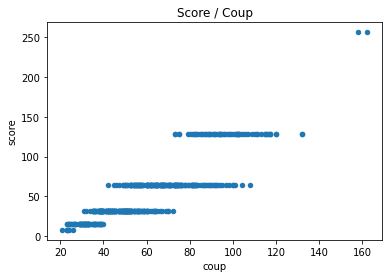

In [16]:
df.plot(x='coup', y='score', kind='scatter', title="Score / Coup");

## Une autre stratégie pour illustrer l'héritage

On veut essayer une autre stratégie et la comparer avec la précédente. Pour cela, on crée une seconde classe dans laquelle on remplace la méthode `coup_suivant`. On pourrait tout copier coller mais c'est très souvent la plus mauvaise option. Et pour éviter cela, on crée une seconde classe qui [hérite](http://www.xavierdupre.fr/app/teachpyx/helpsphinx/c_classes/classes.html?highlight=h%C3%A9ritage#heritage) de la précédente, puis on remplace la méthode souhaitée.

In [17]:
class c2048_4(c2048):
    
    def coup_suivant(self):
        # une direction aléatoire parmi 0 ou 4
        h = numpy.random.randint(0, 3)
        return h

obs = []
for i in tqdm(range(500)):
    J = c2048()
    J.partie()
    obs.append(dict(score=J.score, coup=J.coup))

df2 = DataFrame(obs)
df2.head()

100%|██████████| 500/500 [00:01<00:00, 299.41it/s]


,score,coup
0,64,55
1,64,65
2,32,52
3,32,51
4,64,67


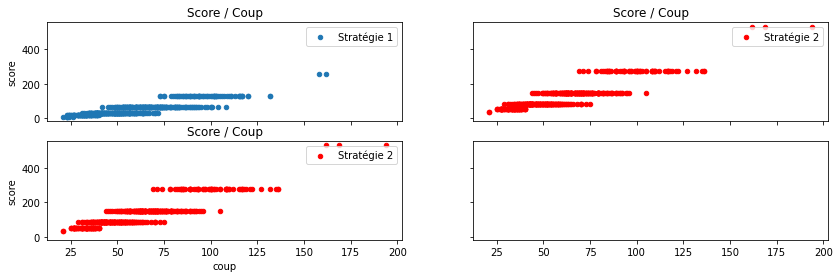

In [18]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 2, figsize=(14, 4), sharey=True, sharex=True)
df.plot(x='coup', y='score', kind='scatter', title="Score / Coup", label="Stratégie 1", ax=ax[0, 0])
df2.plot(x='coup', y='score', kind='scatter', title="Score / Coup", label="Stratégie 2", ax=ax[1, 0], color='red');
df2.plot(x='coup', y='score', kind='scatter', title="Score / Coup", label="Stratégie 2", ax=ax[0, 1], color='red');

La stratégie 2 paraît meilleure : jouer aléatoire dans toutes les directions est plus efficace que dans deux directions.